## Build a simple trading strategy 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Munging the stock data and add two columns - MA10 and MA50

In [12]:
#import FB's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
fb = pd.DataFrame.from_csv('../data/facebook.csv')
# fb['MA10'] = fb['Close'].rolling(10).mean()
# fb['MA50'] = fb['Close'].rolling(50).mean()
# fb = fb.dropna()
# fb.head()

In [45]:
files = ! ls ../data

In [31]:
! ls ../data/indice

ALLOrdinary.csv  DAXI.csv  HSI.csv	    nasdaq_composite.csv  SP500.csv
CAC40.csv	 DJI.csv   indicepanel.csv  Nikkei225.csv	  SPY.csv


In [46]:
len(files)

7

In [43]:
from IPython.display import HTML
import base64  
def create_download_link(filename, title = "Download CSV file"):  
    df = pd.DataFrame.from_csv(f'../data/indice/{filename}')
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=f'psfa_ind_{filename}')
    return HTML(html)

create_download_link(files[9])

In [8]:
fb.loc['2016-01-01':'2016-12-31', 'Close']

Date
2016-01-04     32.369999
2016-01-05     32.889999
2016-01-06     31.530001
2016-01-07     30.280001
2016-01-08     29.629999
2016-01-11     29.680000
2016-01-12     30.180000
2016-01-13     29.260000
2016-01-14     28.670000
2016-01-15     27.110001
2016-01-19     27.330000
2016-01-20     27.480000
2016-01-21     27.799999
2016-01-22     28.450001
2016-01-25     28.420000
2016-01-26     28.700001
2016-01-27     28.360001
2016-01-28     28.049999
2016-01-29     29.290001
2016-02-01     29.299999
2016-02-02     28.059999
2016-02-03     28.200001
2016-02-04     28.209999
2016-02-05     26.430000
2016-02-08     25.219999
2016-02-09     25.490000
2016-02-10     25.430000
2016-02-11     25.299999
2016-02-12     25.730000
2016-02-16     26.990000
                 ...    
2016-11-17     92.389999
2016-11-18     93.360001
2016-11-21     92.980003
2016-11-22     93.650002
2016-11-23     93.970001
2016-11-25     94.160004
2016-11-28     94.110001
2016-11-29     93.250000
2016-11-30     92.19

### 2. Add "Shares" column to make decisions base on the strategy 

In [6]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

fb['Shares'] = [1 if fb.loc[ei, 'MA10']>fb.loc[ei, 'MA50'] else 0 for ei in fb.index]

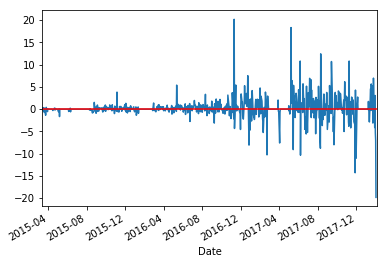

In [7]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]
fb['Profit'].plot()
plt.axhline(y=0, color='red')

### 3. Use .cumsum() to display our model's performance if we follow the strategy 

In [8]:
#Use .cumsum() to calculate the accumulated wealth over the period

fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,245.800003,3.080002,177.820011
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,1,240.500000,-5.300003,172.520008
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,1,233.520004,-6.979996,165.540012
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,239.747003,211.685401,1,213.699997,-19.820007,145.720005
2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,237.748003,211.638401,1,NaN,NaN,NaN


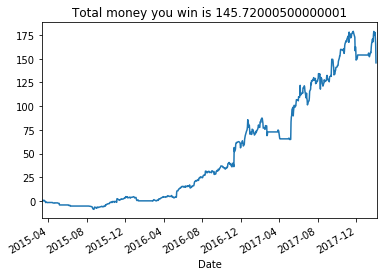

In [12]:
#plot the wealth to show the growth of profit over the period

fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))

## You can create your own simple trading strategy by copying the codes above and modify the codes accordingly using the data of Microsoft (microsoft.csv).